
# Project: No Show Appointments.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The columns in this datasets are:

- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female
- Appointment day: The day of the actuall appointment, when they have to visit the doctor.
- Schedule day: The day someone called or registered the appointment, this is before appointment of course.
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place i.e the location of the hospital.
- Scholarship:  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- No-show: Indicates whether or not the patient showed up for their appointment. (Note: Be careful about the encoding of this     column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if theydid not show up.


### Question(s) for Analysis
1. How many patients were enrolled in the Brasilian welfare program?
2. Does gender affect who shows up for an appointment?
3. Does age of the patients infuence their appointment attendance?


In [1]:
# Importing Packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

^C


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset.


### General Properties

In [3]:
no_show_data = pd.read_csv('C:\\Users\\CHIDIMMA\\Downloads\\noshowappointments-kagglev2-may-2016 (1).csv')

In [4]:
no_show_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
no_show_data.shape

(110527, 14)

In [6]:
no_show_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
no_show_data.duplicated().sum()

0

In [8]:
no_show_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Incorect column headers(hipertension and handcap)
- No null values nor duplicated values
- Minimum age is -1 which is wrong and could be an imputation error.


### Data Cleaning
 

In [9]:
# rename no-show column to no_show using rename
no_show_data.rename(columns={'No-show':'No_Show', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)
no_show_data.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


- Select incorrect column headers and replace them with the correct spellings
- Change No-show to No_Show

In [10]:
no_show_data['Gender'] =no_show_data['Gender'].str.replace('M', 'Male')
no_show_data['Gender'] =no_show_data['Gender'].str.replace('F', 'Female')
no_show_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Replace the abbreviated gender(F,M) with the full word(Female, Male).

In [11]:
#get the row where age is equal to -1
no_show_data[no_show_data['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
99832,4.659432e+14,5775010,Female,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#drop the row where age is equal to -1
no_show_data.drop([99832], inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


In [13]:
#assign names; NoShow and Show to No_show's "yes" or "no" respectively for better understanding and comparison.
NoShow = no_show_data.No_Show == 'Yes'
Show = no_show_data.No_Show == 'No'

- Column No_show's 'Yes' was assigned the variable 'NoShow'
- Column No_Show's 'No' was assigned the variable Show.

This is to enable readability, better understanding and comparison.

### How many patients were enrolled in the Brasilian welfare program?


In [14]:
scholarship_patients_counts = no_show_data.Scholarship.value_counts()
scholarship_patients_counts

0    99665
1    10861
Name: Scholarship, dtype: int64

In [15]:
scholarship_patients_counts/len(no_show_data.Scholarship)

0    0.901734
1    0.098266
Name: Scholarship, dtype: float64

Text(0.5, 1.0, 'Number of scholarship patients')

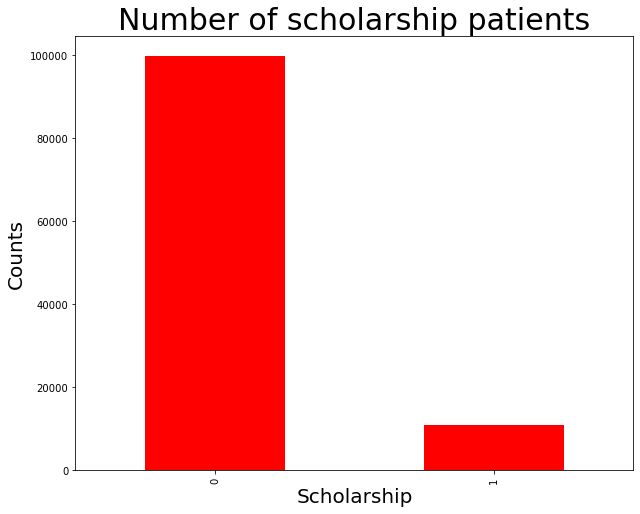

In [16]:
plt.figure(figsize=(10, 8))
scholarship_patients_counts.plot(kind='bar', color='r')
plt. ylabel('Counts', fontsize=20)
plt.xlabel('Scholarship', fontsize=20)
plt.title('Number of scholarship patients', fontsize=30)

- Get the count of the patients enrolled in the Brasilian welfare program.
- Plot a bar graph to visually represent the values.
- 90% of the patients are not enrolled in the welfare program

### Does gender affect who shows up for an appointment?


In [40]:
#get the number of each gender that did not show up for their appointment
gender_vs_noshow = no_show_data.Gender[NoShow].value_counts()
gender_vs_noshow

Female    14594
Male       7725
Name: Gender, dtype: int64

In [41]:
#get the number of each gender that showed up for their appointment
gender_vs_show = no_show_data.Gender[Show].value_counts()
gender_vs_show

Female    57245
Male      30962
Name: Gender, dtype: int64

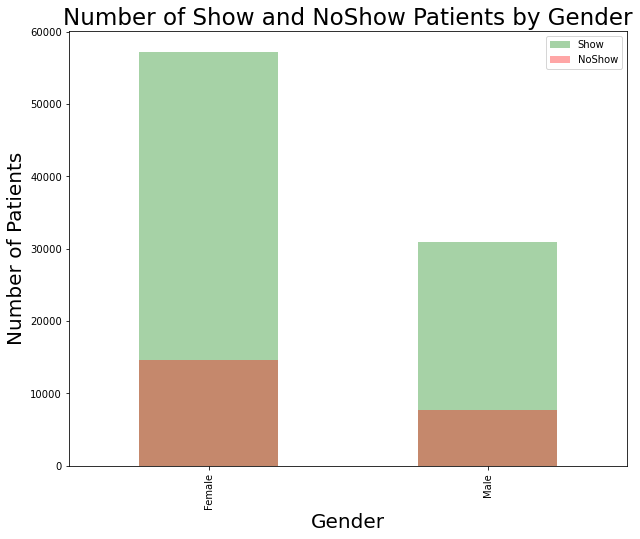

In [42]:
#plot a stacked bar graph
plt.figure(figsize=(10, 8))
gender_vs_show.plot(kind='bar', alpha=0.35, label='Show', color='g')
gender_vs_noshow.plot(kind='bar', alpha=0.35, label='NoShow', color='r')
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Number of Patients', fontsize=20)
plt.title('Number of Show and NoShow Patients by Gender', fontsize=23)
plt.legend()

- Get the number of each gender that showed up for their appointment and assign the resulting data to a variable 'gender_vs_show'.
- Get the number of each gender that did not showed up for their appointment and assign the resulting data to a variable 'gender_vs_noshow.
- Compare each data using a stacked bar graph.
- The data showed that there are no clear effects of gender on appointment attendance.

### Does age of the patients infuence their appointment attendance?

In [35]:
#get the ages and Show data
age_vs_show = no_show_data.Age[Show]
age_vs_show

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 88207, dtype: int64

In [34]:
#get the ages and NoShow data 
age_vs_noshow = no_show_data.Age[NoShow]
age_vs_noshow

6         23
7         39
11        29
17        40
20        30
          ..
110484    45
110492    33
110496    37
110515    33
110516    37
Name: Age, Length: 22319, dtype: int64

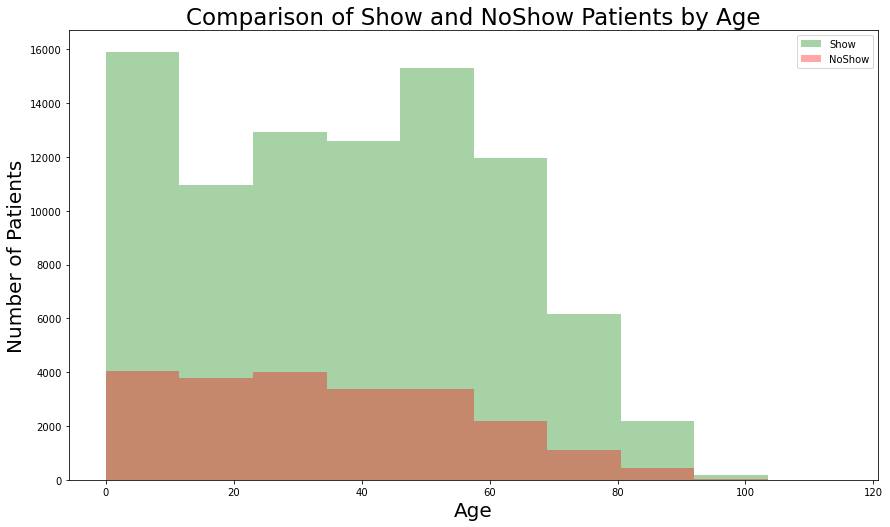

In [45]:
#plot a histogram for comparison

plt.figure(figsize=(14.50, 8.27))
age_vs_show.plot(kind='hist', alpha=0.35, label='Show', color='g')
age_vs_noshow.plot(kind='hist', alpha=0.35, label='NoShow', color='r')
plt.legend()
plt.xlabel('Age', fontsize=20)
plt.ylabel('Number of Patients', fontsize=20)
plt.title('Comparison of Show and NoShow Patients by Age', fontsize=23);



- Get the ages and the show data and assign it to the variable 'age_vs_show'.
- Get the ages and the no show data, and assign it to the variable 'age_vs_noshow'
- Use the histogram graph to show the comparison between both data.
- The data showed that younger patients(0-10) showed up more for their appointment(this could be as a result of parents taking care of their infants), followed by age 50-65.

<a id='conclusions'></a>
## Conclusions
> #### Results: Our data showed that
>
>   1. 90% of the patients are not enrolled in the welfare program and 10% of the patients are enrolled in the welfare program.
>   2. It is a popular saying that women take more care of their health than men do but analysing this dataset have shown that there is no clear influence of gender on appointment attendance.
>   3. Age of the patients has an influence on their attendance, as younger patients of age group 0-10 showed up more than the older patients of age group 70-105.
>
> #### Limitation 
>    Most of our data is categorical, hence strong correlations cannot be shown between factors. Because most of our data is categorical, it is difficult to derive accurate insights that can be summarized in an objective manner.
>    
     


## Submitting your Project 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])